In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import cv2
X = []
Y = []
Z = {
    
}
a = 0;
for folder in os.listdir('/content/drive/MyDrive/train'):
  print(folder)
  Z[folder] = a
  a+=1
  for image in os.listdir('/content/drive/MyDrive/train/'+folder):
    img = cv2.imread('/content/drive/MyDrive/train/'+folder + '/' + image)
    img = cv2.resize(img, (64, 64))
    Y.append(Z[folder])
    X.append(img)

O
E
G
T
P
I
H
S
V
Q
J
R
C
W
A
Y
M
F
Z
B
L
X
0
D
U
N
K


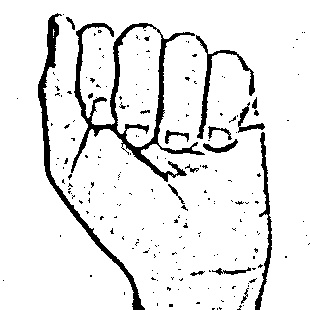

(310, 310, 3)
(64, 64, 3)


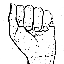

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/drive/MyDrive/train/A/1.jpg')
cv2_imshow(img)
print(img.shape)
img = cv2.resize(img, (64, 64))
print(img.shape)
cv2_imshow(img)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
Y = np.asarray(Y)
Y = np.transpose(Y)
Y = Y.reshape((12845, 1))
print(Y.shape)
y = enc.fit(Y)

(12845, 1)


In [ ]:
Y = y.transform(Y).toarray()
Y.shape

(12845, 27)

In [ ]:
len(X)
X = np.asarray(X)
print(Y)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
import tensorflow as tf
model = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(64,64,3),
    pooling=None,
    classes=27,
)

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
model2 = tf.keras.Sequential([model, tf.keras.layers.Flatten(), tf.keras.layers.Dense(27, activation='softmax')])
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2, 2, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 27)                221211    
Total params: 23,808,923
Trainable params: 23,755,803
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
model2.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
model2.fit(X, Y, epochs=2)

Epoch 1/2
402/402 [==============================] - 2243s 6s/step - loss: 1.4403 - accuracy: 0.8156
Epoch 2/2
402/402 [==============================] - 1961s 5s/step - loss: 0.0679 - accuracy: 0.9902


In [ ]:
print(Z)

{'O': 0, 'E': 1, 'G': 2, 'T': 3, 'P': 4, 'I': 5, 'H': 6, 'S': 7, 'V': 8, 'Q': 9, 'J': 10, 'R': 11, 'C': 12, 'W': 13, 'A': 14, 'Y': 15, 'M': 16, 'F': 17, 'Z': 18, 'B': 19, 'L': 20, 'X': 21, '0': 22, 'D': 23, 'U': 24, 'N': 25, 'K': 26}


In [ ]:
temp = cv2.imread('/content/drive/MyDrive/train/A/100.jpg')
temp = cv2.resize(temp, (64, 64))
temp.shape
temp = temp.reshape((1, 64, 64, 3))
Z_inverse = {v: k for k, v in Z.items()}
Z_inverse[np.argmax(model2.predict(temp))]

NameError: ignored

In [ ]:
model2.save('/content/drive/MyDrive/model2.h5')

In [ ]:
print(model2.predict(temp))

[[7.42913357e-07 3.67097440e-04 1.11539828e-06 2.11376628e-05
  1.61000971e-05 6.07657921e-06 7.45697662e-06 1.41588198e-05
  1.44542923e-07 3.48923982e-06 6.41133795e-08 4.84799472e-08
  3.74219999e-05 1.86802699e-05 9.99338090e-01 4.56312337e-05
  2.65371955e-06 7.54895109e-06 5.23831602e-07 5.03643150e-06
  2.66715119e-06 2.03151103e-06 5.20125013e-07 1.91724354e-07
  1.14048376e-07 1.00813108e-04 4.33417711e-07]]
